# DARWIN-LZ size plots 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [9]:
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = 'Ubuntu'
#plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 15
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 14


In [62]:
d_LXe = 2.862 #g/cm3
r = np.linspace(0.5, 2, 100)
ratios = np.array([0.5,0.8,1,1.2,1.5,2])

target_masses = np.array([40,60,80])
#target_diameter = target_masses / (np.pi*Ratio
cmap = plt.get_cmap('inferno')

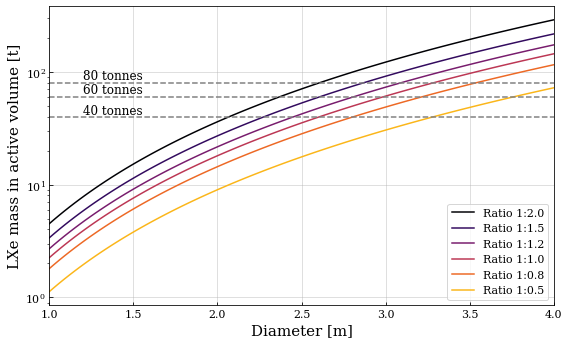

In [63]:
plt.figure(figsize=(8,5))
for i,ratio in enumerate(np.flip(ratios)):
    plt.plot(r*2,r**2*np.pi*r*2*d_LXe*ratio, 
             label = 'Ratio 1:%s'%ratio,
             c = cmap(i/len(ratios))
            )
#plt.plot(r*2,r**2*np.pi*r*2*d_LXe*1.2, label = 'Ratio 1:1.2')
#plt.plot(r*2,r**2*np.pi*r*2*d_LXe*1.5, label = 'Ratio 1:1.5')
plt.xlabel('Diameter [m]')
plt.ylabel('LXe mass in active volume [t]')

plt.axhline(40, ls= '--', c = 'grey')
plt.axhline(60, ls= '--', c = 'grey')
plt.axhline(80, ls= '--', c = 'grey')
plt.yscale('log')

plt.text(1.2,42,'40 tonnes')
plt.text(1.2,64,'60 tonnes')
plt.text(1.2,86,'80 tonnes')

plt.tight_layout()
plt.tick_params(axis='both' , direction='in') 
plt.legend()
plt.grid(alpha = 0.5)
plt.xlim(1,4)
plt.savefig('DARWIN-LZ_masses.png')

plt.show()

In [91]:
r = np.linspace(0.5, 2, 1000)
h = np.linspace(0.2,5,1000)
d = 2*r
rr, hh = np.meshgrid(r, h)

m = r**2*np.pi*h*d_LXe
mm = rr**2*np.pi*hh*d_LXe

In [92]:
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = 'Ubuntu'
#plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 15
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 14

In [93]:
def fmt(x):
    s = '%s tonnes'%x
    return s

In [108]:
%matplotlib inline

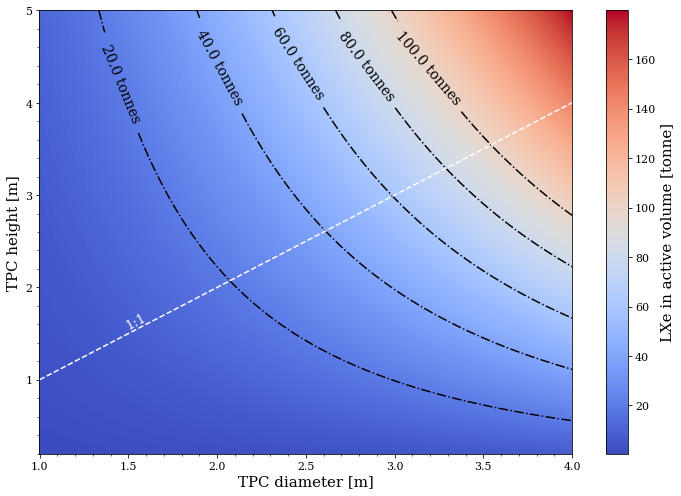

In [125]:
cmap = plt.get_cmap('coolwarm')

fig, ax = plt.subplots(1,1,figsize = (10,7))
pcm = ax.pcolormesh(r*2,h,mm, cmap = cmap)


contours = ax.contour(rr*2,hh,mm,[20,40,60, 80, 100],linestyles = '-.',colors = 'black')
manual_locations = [(1.55, 4.3), (2.1, 4.5), (2.5, 4.5), (2.9, 4.5), (3.3, 4.6)]
ax.clabel(contours, contours.levels, inline=True, fmt = fmt,fontsize=14, manual = manual_locations)

ax.set_ylabel('TPC height [m]')
ax.set_xlabel('TPC diameter [m]')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

fig.colorbar(pcm, label = 'LXe in active volume [tonne]')

ax.plot(d,d, c = 'white', ls = '--') 
l2 = np.array((5, 5))
trans_angle = plt.gca().transData.transform_angles(np.array((45,)),
                                                   l2.reshape((1, 2)))[0]
ax.text(1.5,1.55,'1:1', color = 'white',rotation=trans_angle, rotation_mode='anchor', fontsize = 13)
fig.tight_layout()
#ax.grid(alpha = 0.1, zorder = -1)
plt.savefig('DARWIN-LZ_sizes_space.png')
plt.show()